In [1]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import string
import re
from scipy.sparse import hstack

In [2]:
df = pd.read_csv("Final_data.csv")

In [3]:
df.head()

,Unnamed: 0,ix,date,id,link,retweet,text,author,Hashtag count,Punctuation count,Character count,word_count,Mentions Count,Unnamed: 13,Acronym Count,URL Count,Unnamed: 16,combined_vector,clean_text
0,399,399,25-Sep,7.800000e+17,/amardeepkaushal/status/780133028010004481,1,"""@kdnuggets: #icymi #bigdata and the internet ...",various,3,16,136,16,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets icymi bigdata and the internet of th...
1,5168,5168,11-Jun,7.420000e+17,/EdgarSanchez/status/741764638975500290,1,"""@kdnuggets: r or #python? consider learning b...",various,3,15,139,22,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets r or python consider learning both k...
2,5836,5836,28-May,7.370000e+17,/MaxNigrelli72/status/736596414864752641,1,"""@kdnuggets: #deeplearning in a nutshell what...",various,2,17,139,22,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets deeplearning in a nutshell what it ...
3,6780,6780,09-May,7.300000e+17,/MaxNigrelli72/status/729768855522906113,1,"""@kdnuggets: how #bigdata helps build smart ci...",various,2,19,124,16,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets how bigdata helps build smart cities...
4,8993,8993,01-Apr,7.160000e+17,/PrecisionPoint2/status/716037533671534592,1,"""@kdnuggets #machinelearning as a service: how...",various,2,16,130,14,0,NaN,0,2,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets machinelearning as a service how dat...


In [4]:
#Tokenization
df['tokens'] = df['clean_text'].apply(nltk.word_tokenize)

In [5]:
df.head()

,Unnamed: 0,ix,date,id,link,retweet,text,author,Hashtag count,Punctuation count,Character count,word_count,Mentions Count,Unnamed: 13,Acronym Count,URL Count,Unnamed: 16,combined_vector,clean_text,tokens
0,399,399,25-Sep,7.800000e+17,/amardeepkaushal/status/780133028010004481,1,"""@kdnuggets: #icymi #bigdata and the internet ...",various,3,16,136,16,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets icymi bigdata and the internet of th...,"[kdnuggets, icymi, bigdata, and, the, internet..."
1,5168,5168,11-Jun,7.420000e+17,/EdgarSanchez/status/741764638975500290,1,"""@kdnuggets: r or #python? consider learning b...",various,3,15,139,22,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets r or python consider learning both k...,"[kdnuggets, r, or, python, consider, learning,..."
2,5836,5836,28-May,7.370000e+17,/MaxNigrelli72/status/736596414864752641,1,"""@kdnuggets: #deeplearning in a nutshell what...",various,2,17,139,22,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets deeplearning in a nutshell what it ...,"[kdnuggets, deeplearning, in, a, nutshell, wha..."
3,6780,6780,09-May,7.300000e+17,/MaxNigrelli72/status/729768855522906113,1,"""@kdnuggets: how #bigdata helps build smart ci...",various,2,19,124,16,0,NaN,1,1,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets how bigdata helps build smart cities...,"[kdnuggets, how, bigdata, helps, build, smart,..."
4,8993,8993,01-Apr,7.160000e+17,/PrecisionPoint2/status/716037533671534592,1,"""@kdnuggets #machinelearning as a service: how...",various,2,16,130,14,0,NaN,0,2,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",kdnuggets machinelearning as a service how dat...,"[kdnuggets, machinelearning, as, a, service, h..."


In [6]:
# Assuming you have a DataFrame 'df' containing the numeric columns
# Extract the numeric columns from the DataFrame
numeric_columns = df[['Hashtag count', 'Punctuation count', 'Character count', 'word_count', 'Mentions Count', 'Acronym Count', 'URL Count']]

In [7]:
import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
max_seq_length = 100
dummy_text = 0 # Define the dummy text

# Pad the tokenized text with the dummy text
padded_tokens = pad_sequences(df['tokens'], maxlen=max_seq_length, padding='post', dtype='object', value=0)

In [9]:
# Convert the numeric columns to a sparse matrix
numeric_matrix = numeric_columns.values

In [10]:
numeric_matrix

array([[  3,  16, 136, ...,   0,   1,   1],
       [  3,  15, 139, ...,   0,   1,   1],
       [  2,  17, 139, ...,   0,   1,   1],
       ...,
       [  0,  11, 146, ...,   0,   0,   1],
       [  0,  12, 145, ...,   1,   0,   1],
       [  0,  11, 136, ...,   0,   0,   1]], dtype=int64)

In [11]:
y = df['retweet']
y

0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: retweet, Length: 2000, dtype: int64

In [12]:
#Train Word2Vec on the tokenized text
model = Word2Vec(df['tokens'], sg=1, vector_size=100, window=5, min_count=1, workers=4)

In [13]:
combined_data = []
for tokens, features in zip(padded_tokens, numeric_matrix):
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if word_vectors:
        # Concatenate the word vectors and the numeric features
        combined_vector = np.concatenate([np.mean(word_vectors, axis=0), features])
        combined_data.append(combined_vector)

In [14]:
X = combined_data

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knnclassifier=KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(X_train,y_train)
y_pred = knnclassifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


In [18]:
print(f'KNN Accuracy: {accuracy:.2f} \n')
# Print a classification report for more detailed metrics
report = classification_report(y_test, y_pred, target_names=['1','0'])
print(report)


KNN Accuracy: 0.87 

              precision    recall  f1-score   support

           1       0.85      0.90      0.88       201
           0       0.89      0.84      0.87       199

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



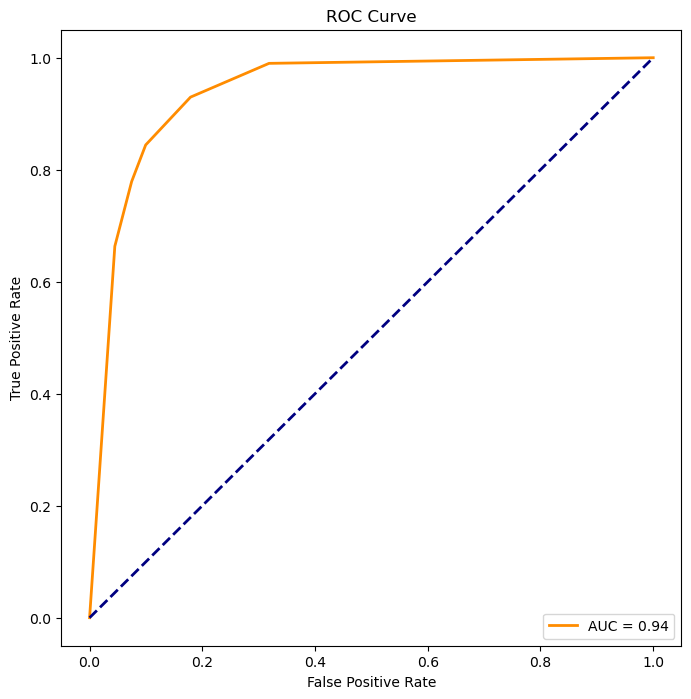

In [19]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
# ROC Curve
y_prob = knnclassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
gradientregressor = GradientBoostingRegressor(max_depth = 3, n_estimators = 4, learning_rate = 2.0)
gradientregressor

accuracy = accuracy_score(y_test, y_pred.round())


# Print a classification report for more detailed metrics
report = classification_report(y_test, y_pred, target_names=['1','0'])
print(report)

              precision    recall  f1-score   support

           1       0.85      0.90      0.88       201
           0       0.89      0.84      0.87       199

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [22]:
#Training and Predicting
gmodel = gradientregressor.fit(X_train, y_train)
y_pred = gmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred.round())

In [23]:
print(f'GB Accuracy: {accuracy:.2f}\n')
# Print a classification report for more detailed metrics
#report = classification_report(y_test, y_pred, target_names=['1','0'])
#print(report)

GB Accuracy: 0.53



In [ ]:
# ROC Curve
y_prob = knnclassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [24]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)
# Predict the labels for the test data
y_pred = rf_classifier.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


In [25]:
print(f'Random Forest Accuracy: {accuracy:.2f}\n')
# Print a classification report for more detailed metrics
report = classification_report(y_test, y_pred, target_names=['1','0'])
print(report)

Random Forest Accuracy: 0.95

              precision    recall  f1-score   support

           1       0.93      0.98      0.95       201
           0       0.97      0.93      0.95       199

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



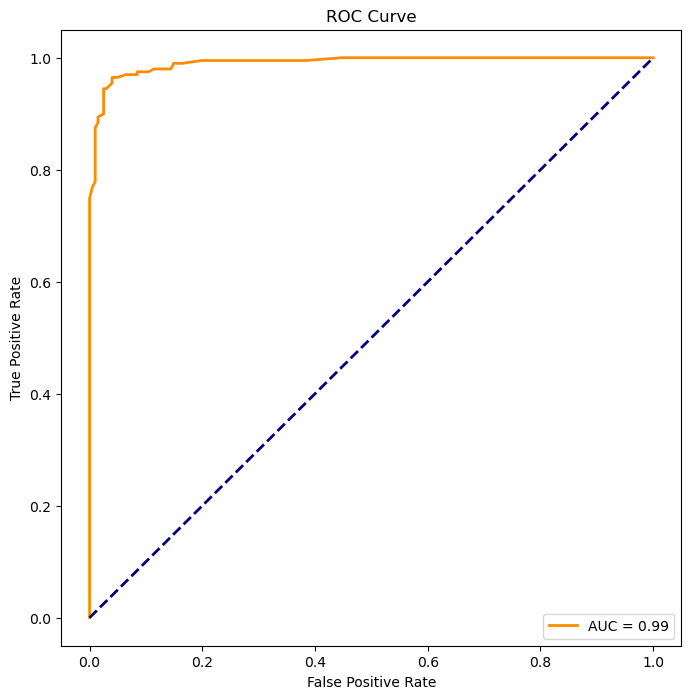

In [26]:
# ROC Curve
y_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [27]:
from sklearn.svm import SVC

In [28]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)



In [29]:
print(f'SVM Accuracy: {accuracy:.2f}\n')
# Print a classification report for more detailed metrics
report = classification_report(y_test, y_pred, target_names=['1','0'])
print(report)

SVM Accuracy: 0.91

              precision    recall  f1-score   support

           1       0.89      0.93      0.91       201
           0       0.93      0.88      0.90       199

    accuracy                           0.91       400
   macro avg       0.91      0.90      0.90       400
weighted avg       0.91      0.91      0.90       400



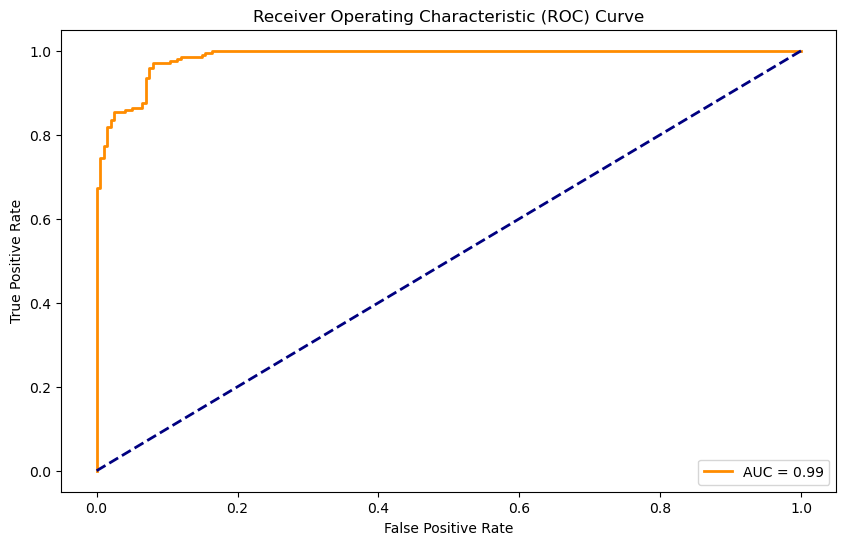

AUC: 0.99


In [30]:
# Plot ROC Curve and calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, svm_classifier.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC
print(f'AUC: {roc_auc:.2f}')

In [31]:
target_variable_column = 'retweet'

# Count the occurrences of 0s and 1s in the target variable column
count_0 = df[target_variable_column].value_counts().get(0, 0)
count_1 = df[target_variable_column].value_counts().get(1, 0)

In [19]:
count_0

1409

In [20]:
count_1

839